In [3]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import tensorflow.compat.v1 as tf
import random

tf.disable_v2_behavior()
print("Num GPUs Available: ", tf.test.is_built_with_cuda())

path="./data"
IMG_SIZE=100

Num GPUs Available:  False


In [4]:
dog_files=os.listdir(path+'/dogs')
wolf_files=os.listdir(path+'/wolves')
image_paths = []
#label: 0 for dog ,1 for wolf # woof -woof
labels=[]
img=[]
for file in dog_files:
    image = cv2.imread(path+'/'+'dogs/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
    #Creating and saving each image in the form of numerical data in an array
    img.append(norm_image.flatten())
    labels.append(0)
    image_paths.append(path+'/'+'dogs/'+file)
for file in wolf_files:
    image = cv2.imread(path+'/'+'wolves/'+file)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
    image_paths.append(path+'/'+'wolves/'+file)

    img.append(norm_image.flatten())
    labels.append(1)

0


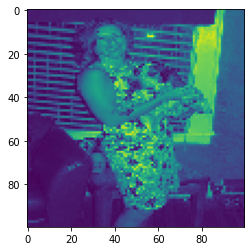

In [5]:
df={'data':img,'label':labels}
df=pd.DataFrame(df)
df = df.sample(frac=1).reset_index(drop=True)

plt.imshow(df.data[0].reshape(IMG_SIZE,IMG_SIZE))
print(df.label[1])
#main_train_df,test_df=train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
#train_df,val_df=train_test_split(main_train_df, test_size=0.1,shuffle=True,random_state=42)
#random.shuffle(df)
train_df=df[:1400]
val_df=df[1400:1600]
test_df=df[1600:]


In [7]:
x_train=list(train_df.data)
y_train=np.array(train_df.label).reshape(1400,1)
x_val=list(val_df.data)
y_val=np.array(val_df.label).reshape(200,1)
x_test=list(test_df.data)
y_test=np.array(test_df.label).reshape(400,1)

In [9]:
(hidden1_size, hidden2_size) = (100, 50)
x =tf.placeholder(tf.float32,[None,IMG_SIZE*IMG_SIZE])
y_ = tf.placeholder(tf.float32,[None,1])
W1 = tf.Variable(tf.truncated_normal([IMG_SIZE*IMG_SIZE, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_size]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)
W3 = tf.Variable(tf.truncated_normal([hidden2_size, 10], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[10]))
pred = tf.nn.softmax(tf.matmul(z2, W3) + b3)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [5]:


sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(0,10000):
    if i%1000==0 and i!=0:
        print(cross_entropy.eval(session= sess, feed_dict = {x:x_train,y_:y_train}))
        train_acc = sess.run(accuracy, feed_dict={x:x_train,y_:y_train})
        print (" Training accuracy: %.3f" % (accuracy.eval(session= sess, feed_dict = {x:x_train,y_:y_train})))
        val_acc = sess.run(accuracy, feed_dict={x:x_val,y_:y_val})
        print (" Validation accuracy: %.3f" % (accuracy.eval(session= sess, feed_dict = {x:x_val,y_:y_val})))
    sess.run([train_step],feed_dict={x:x_train,y_:y_train})






The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.data.experimental.shuffle_and_repeat(...)`.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.
Instructions for updating:
Use `tf.data.experimental.map_and_batch(...)`.
Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.




2021-11-27 17:42:52.104183: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA


TypeError: 'DatasetV1Adapter' object is not subscriptable

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

model = tf.estimator.Estimator(model_fn=model_fn,
                               params={"learning_rate": 1e-4},
                               model_dir="./model5/")

count = 0
while (count < 100000):
    model.train(input_fn=train_input_fn, steps=1000)
    result = model.evaluate(input_fn=val_input_fn)
    print(result)
    print("Classification accuracy: {0:.2%}".format(result["accuracy"]))
    sys.stdout.flush()
    count = count + 1